In [1]:
import sys; sys.path.append('..')
from data.imageloader import ImageLoader
from data.load_datasets import get_maastricht_loader, get_pocovid_loader, get_covid_us_loader

In [2]:
IL_pocovid = get_pocovid_loader()

Creating pocovid loader
One hot encoding labels...
path_abs column already exists in index_df. Using old column. If you want to update the paths, drop the column and rerun the script.
Creating cross validation folds...
Created cross validation using 2 classes with: ('Reg', 66) ('Cov', 54) cases per class.


In [3]:
IL_covid_us = get_covid_us_loader()

Creating covid_us loader
One hot encoding labels...
Creating cross validation folds...
Created cross validation using 2 classes with: ('Cov', 61) ('Reg', 17) cases per class.


In [5]:
IL_combined = ImageLoader.combine_dataloaders(IL_pocovid, IL_covid_us, "pocovid", "covid_us")

One hot encoding labels...
path_abs column already exists in index_df. Using old column. If you want to update the paths, drop the column and rerun the script.
Dataframe already has a 'Fold' column. Using that as cross valitation.


In [6]:
IL_combined.stride(5)

Striding frames with stride:  5


In [7]:
train, test = IL_combined.get_tf_dataset(0)
print(f"Created dataset with {len(train)} training and {len(test)} test samples")

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Created dataset with 5127 training and 1458 test samples


2022-09-27 14:57:23.393683: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-27 14:57:23.393789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
for epoch in range(1):
    for images, labels in train:
        print(f"Images shape: {images.shape}, labels shape: {labels.shape}, Labels: {labels.numpy()}")
        break
    ################## TRAIN HERE ##################

Images shape: (224, 224, 3), labels shape: (2,), Labels: [1. 0.]


2022-09-27 14:57:35.069559: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


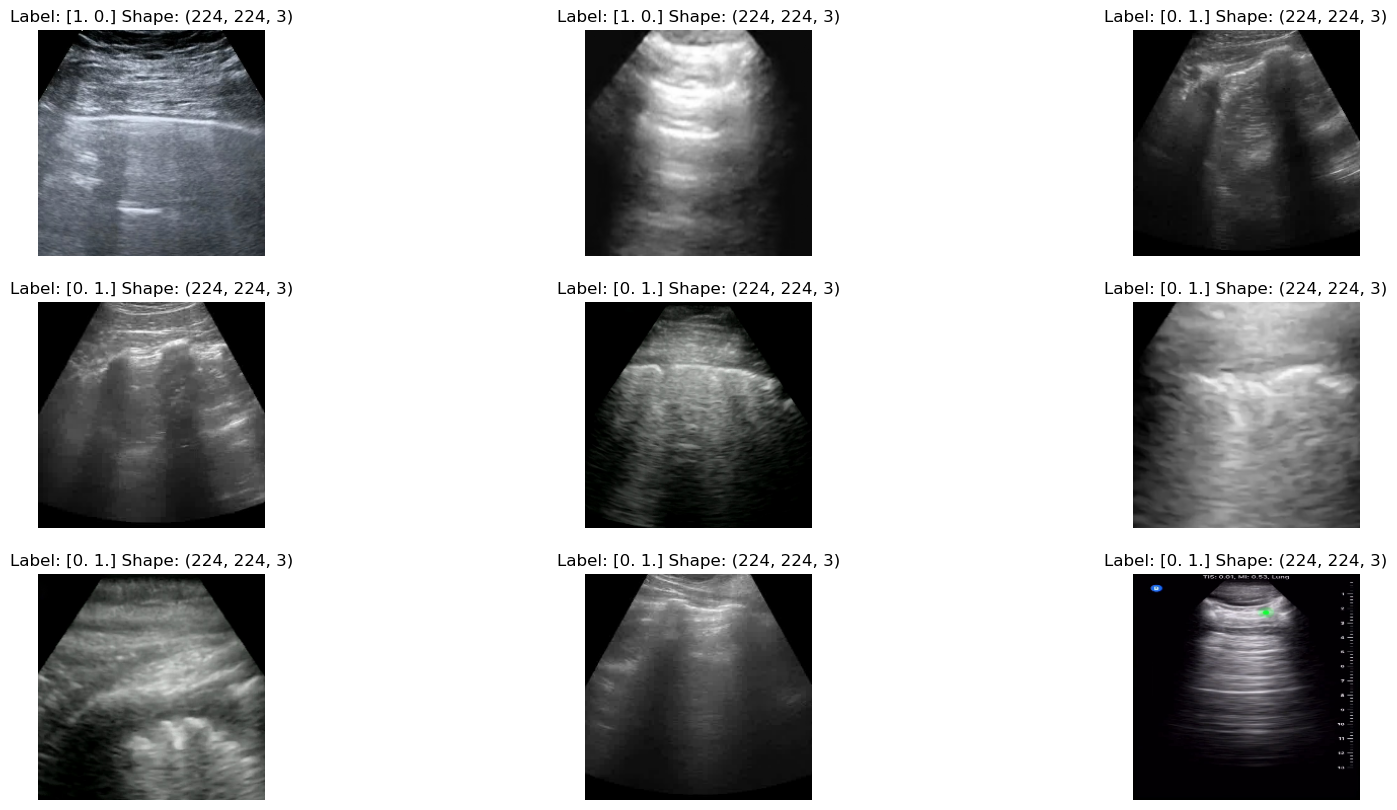

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
counter = 0
for image, label in train:
    plt.subplot(3, 3, counter+1)
    plt.imshow(image, cmap="gray")
    title = "Label: " + str(label.numpy()) + " Shape: " + str(image.numpy().shape)
    plt.title(title); plt.axis('off')
    counter += 1
    if counter == 9:
        break
plt.show()

In [10]:
IL_combined.class_names

array(['Cov', 'Reg'], dtype='<U3')